In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
!pip install mediapipe
%matplotlib inline

In [3]:
import numpy as np
import os
import cv2
import math
import glob
import random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import seaborn as sns
import mediapipe as mp
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import pickle
# Suppress warnings
warnings.filterwarnings('ignore')

# Face mesh module
faceModule = mp.solutions.face_mesh

In [4]:
directory = '/content/drive/MyDrive/AFLW2000'
print(len(os.listdir(directory)))

4001


In [5]:
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

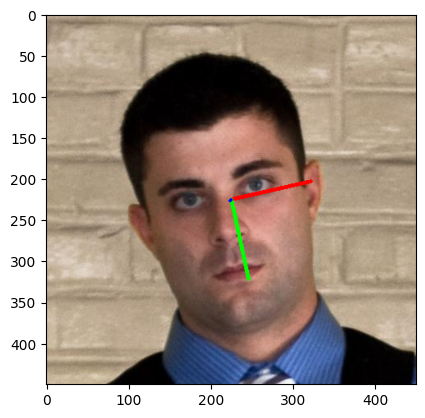

In [6]:
# visualizing data sample

random_file = 'image00013'
# Define the paths to the image and MAT file
image_path = f'{directory}/{random_file}.jpg'
mat_file_path = f'{directory}/{random_file}.mat'

# Load the image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is not None:
    # Load the MAT file to extract the 3 angles of the face (pitch, yaw, roll)
    mat_file = sio.loadmat(mat_file_path)

    # Extract the labels for the 3 angles
    pose_para = mat_file["Pose_Para"][0][:3]
    pitch, yaw, roll = pose_para[0], pose_para[1], pose_para[2]

    # Draw axes on the image
    image_with_axes = draw_axis(image, pitch, yaw, roll)

    # Display the image with axes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

else:
    print(f"Error: Unable to load the image from {image_path}.")